<a href="https://colab.research.google.com/github/j88k77/Machine-Learning-Projects/blob/main/P7_Car_Price_Prediction_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***Car Price Prediction using Linear & Lasso Regression Model***

***Regression problem--> where we predict a particualar value on which a car can be sold.***


In [42]:
#importing the dependencies
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import metrics

***Work flow :-We will train 2 models ( 1- linear regression model(better for postive correlation) and 2- lasso regression model(better for negative correlation)***

 ***Then compare accuracy score of both the model to get better accuracy***

Data Collection adn Processing

In [2]:
#loading the data from csv file to pandas dataframe
car_dataset= pd.read_csv('/content/car data.csv')

In [5]:
#checking first 5 rows
car_dataset.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [6]:
#checking the no.of rows and columns(datapoints)
car_dataset.shape

(301, 9)

In [8]:
#getting some info about dataset
car_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [9]:
#checking for missing values
car_dataset.isnull().sum()


Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [10]:
#checking the distribution for categorical data
print(car_dataset.Fuel_Type.value_counts())
print(car_dataset.Seller_Type.value_counts())
print(car_dataset.Transmission.value_counts())


Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64
Dealer        195
Individual    106
Name: Seller_Type, dtype: int64
Manual       261
Automatic     40
Name: Transmission, dtype: int64


***Text Encoding***

In [29]:
#encoding the Categorical Data
car_dataset.replace({'Fuel_Type':{'Petrol':0, 'Diesel':1,'CNG':2}},inplace=True)
car_dataset.replace({'Seller_Type':{'Dealer':0, 'Individual':1,}},inplace=True)
car_dataset.replace({'Transmission':{'Manual':0, 'Automatic':1,}},inplace=True)

In [30]:
car_dataset.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0


Splitting data into Training & test data

In [31]:
X= car_dataset.drop(['Car_Name','Selling_Price'],axis=1)
Y= car_dataset['Selling_Price']

In [32]:
print(X)

     Year  Present_Price  Kms_Driven  Fuel_Type  Seller_Type  Transmission  \
0    2014           5.59       27000          0            0             0   
1    2013           9.54       43000          1            0             0   
2    2017           9.85        6900          0            0             0   
3    2011           4.15        5200          0            0             0   
4    2014           6.87       42450          1            0             0   
..    ...            ...         ...        ...          ...           ...   
296  2016          11.60       33988          1            0             0   
297  2015           5.90       60000          0            0             0   
298  2009          11.00       87934          0            0             0   
299  2017          12.50        9000          1            0             0   
300  2016           5.90        5464          0            0             0   

     Owner  
0        0  
1        0  
2        0  
3        0 

In [33]:
print(Y)

0       3.35
1       4.75
2       7.25
3       2.85
4       4.60
       ...  
296     9.50
297     4.00
298     3.35
299    11.50
300     5.30
Name: Selling_Price, Length: 301, dtype: float64


Splitting the Training and Test data

In [34]:
X_train,X_test,Y_train,Y_test= train_test_split(X,Y,test_size=0.1,random_state=2)

Model Training

1. Linear Regression (EQ --> y=mx+c)

In [35]:
#loading the linear regression model
lin_reg_model= LinearRegression()

In [36]:
lin_reg_model.fit(X_train,Y_train)

LinearRegression()

Model Evaluation


In [72]:
#prediction on training data
training_data_prediction=lin_reg_model.predict(X_train)

In [73]:
# R squared Error
error_score = metrics.r2_score(Y_train,training_data_prediction)
print('R squared Error',error_score)

R squared Error 0.8799451660493711


***Visulize the actual prices and Predicted prices***

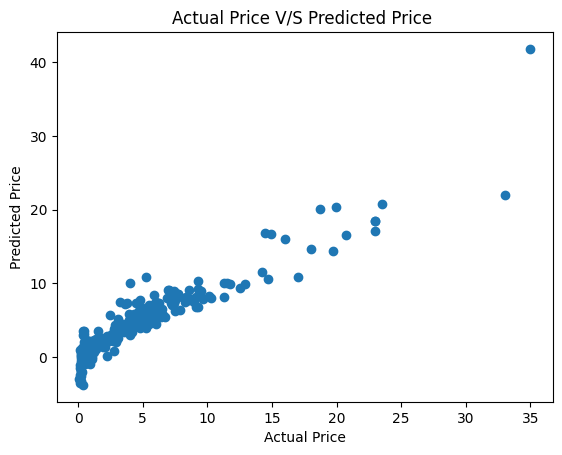

In [74]:
plt.scatter(Y_train,training_data_prediction)
plt.xlabel('Actual Price')
plt.ylabel("Predicted Price")
plt.title("Actual Price V/S Predicted Price ")
plt.show()

In [75]:
#prediction on test data
test_data_prediction=lin_reg_model.predict(X_test)


In [76]:
# R squared Error
error_score_test= metrics.r2_score(Y_test,test_data_prediction)
print('R squared Error',error_score_test)

R squared Error 0.8365766715027051


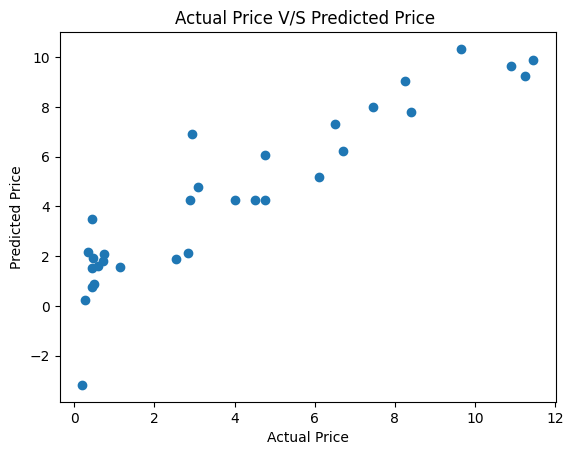

In [77]:
plt.scatter(Y_test,test_data_prediction)
plt.xlabel('Actual Price')
plt.ylabel("Predicted Price")
plt.title("Actual Price V/S Predicted Price ")
plt.show()

2. Lasso Regression Model

In [78]:
#loading the lasso regression model
lass_reg_model= Lasso()

In [79]:
lass_reg_model.fit(X_train,Y_train)

Lasso()

In [82]:
#prediction on training data
training_data_prediction_las=lass_reg_model.predict(X_train)

In [83]:
# R squared Error
error_score_training = metrics.r2_score(Y_train,training_data_prediction_las)
print('R squared Error',error_score_training)

R squared Error 0.8427856123435794


***Visulize the actual prices and Predicted prices***

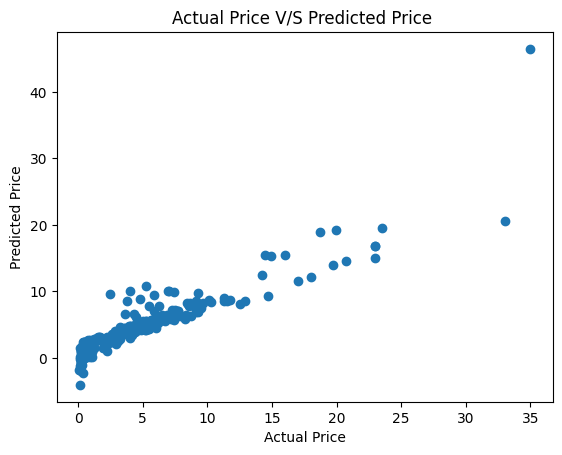

In [84]:
plt.scatter(Y_train,training_data_prediction_las)
plt.xlabel('Actual Price')
plt.ylabel("Predicted Price")
plt.title("Actual Price V/S Predicted Price ")
plt.show()

In [85]:
#prediction on test data
test_data_prediction_las=lass_reg_model.predict(X_test)


In [86]:
# R squared Error
error_score_test= metrics.r2_score(Y_test,test_data_prediction_las)
print('R squared Error',error_score_test)

R squared Error 0.8709167941173195


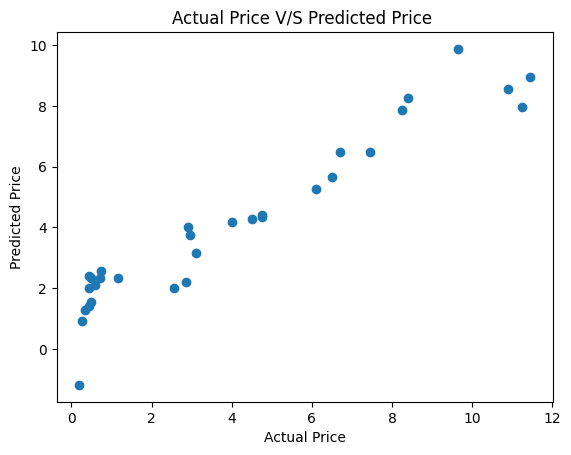

In [87]:
plt.scatter(Y_test,test_data_prediction_las)
plt.xlabel('Actual Price')
plt.ylabel("Predicted Price")
plt.title("Actual Price V/S Predicted Price ")
plt.show()